In [1]:
from karpathy_series.micrograd.assignment import Assignment
from karpathy_series.micrograd.calculation import GraphValuation
from karpathy_series.micrograd.drawing import Drawing
from karpathy_series.micrograd.perceptron import Layer, Neuron
from karpathy_series.micrograd.value import ValueGraph

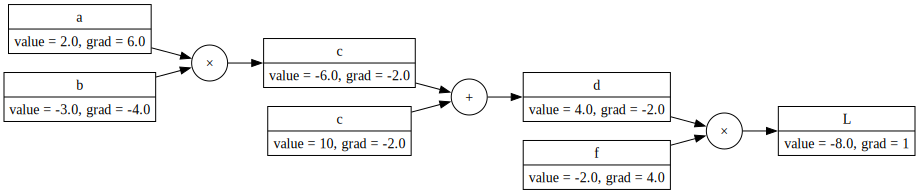

In [3]:
def example_graph():
    G = ValueGraph()
    a, b, c, f = G["a", "b", "c", "f"]
    e = a * b | "c"
    d = e + c | "d"
    _L = d * f | "L"

    a1 = Assignment.create(G, {a: 2.0, b: -3.0, c: 10, f: -2.0})
    g1 = GraphValuation.run(a1)
    return g1


g = example_graph()
drawing = Drawing().draw_graph_valuation(g)
drawing

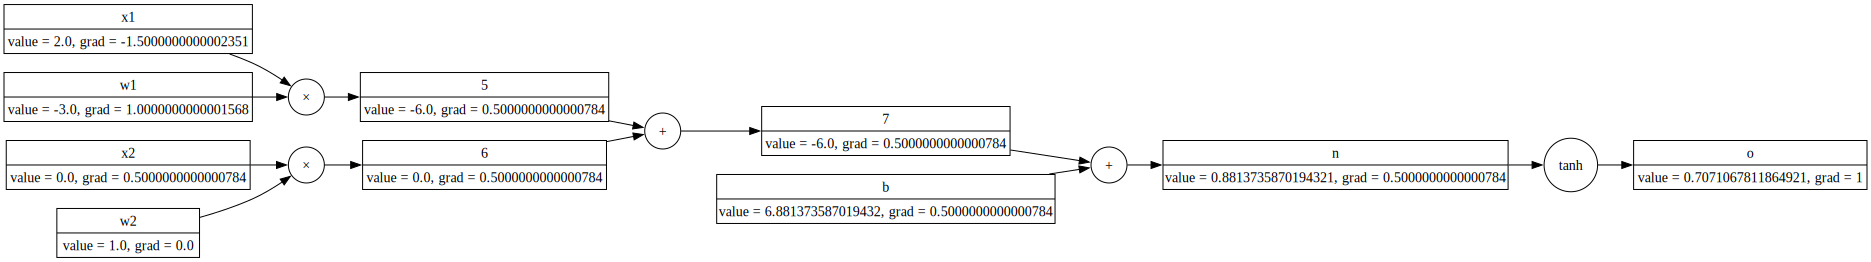

In [4]:
def network_1():
    G = ValueGraph()
    x1, x2, w1, w2, b = G["x1", "x2", "w1", "w2", "b"]
    n = x1 * w1 + x2 * w2 + b | "n"
    _o = n.tanh() | "o"

    a1 = Assignment.create(G, {x1: 2.0, x2: 0.0, w1: -3.0, w2: 1.0, b: 6.881373587019432})
    g1 = GraphValuation.run(a1)
    return g1


g = network_1()
drawing = Drawing().draw_graph_valuation(g)
drawing

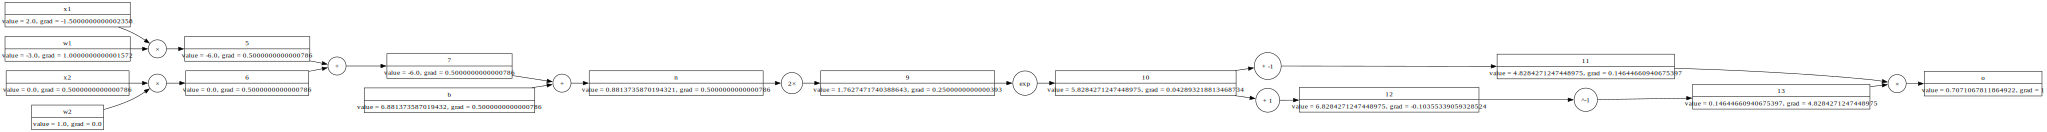

In [5]:
def network_1():
    G = ValueGraph()

    x1, x2, w1, w2, b = G["x1", "x2", "w1", "w2", "b"]
    n = x1 * w1 + x2 * w2 + b | "n"
    e = (2 * n).exp()
    _o = (e - 1) / (e + 1) | "o"

    a1 = Assignment.create(G, {x1: 2.0, x2: 0.0, w1: -3.0, w2: 1.0, b: 6.881373587019432})
    g1 = GraphValuation.run(a1)
    return g1


g = network_1()
drawing = Drawing().draw_graph_valuation(g)
drawing

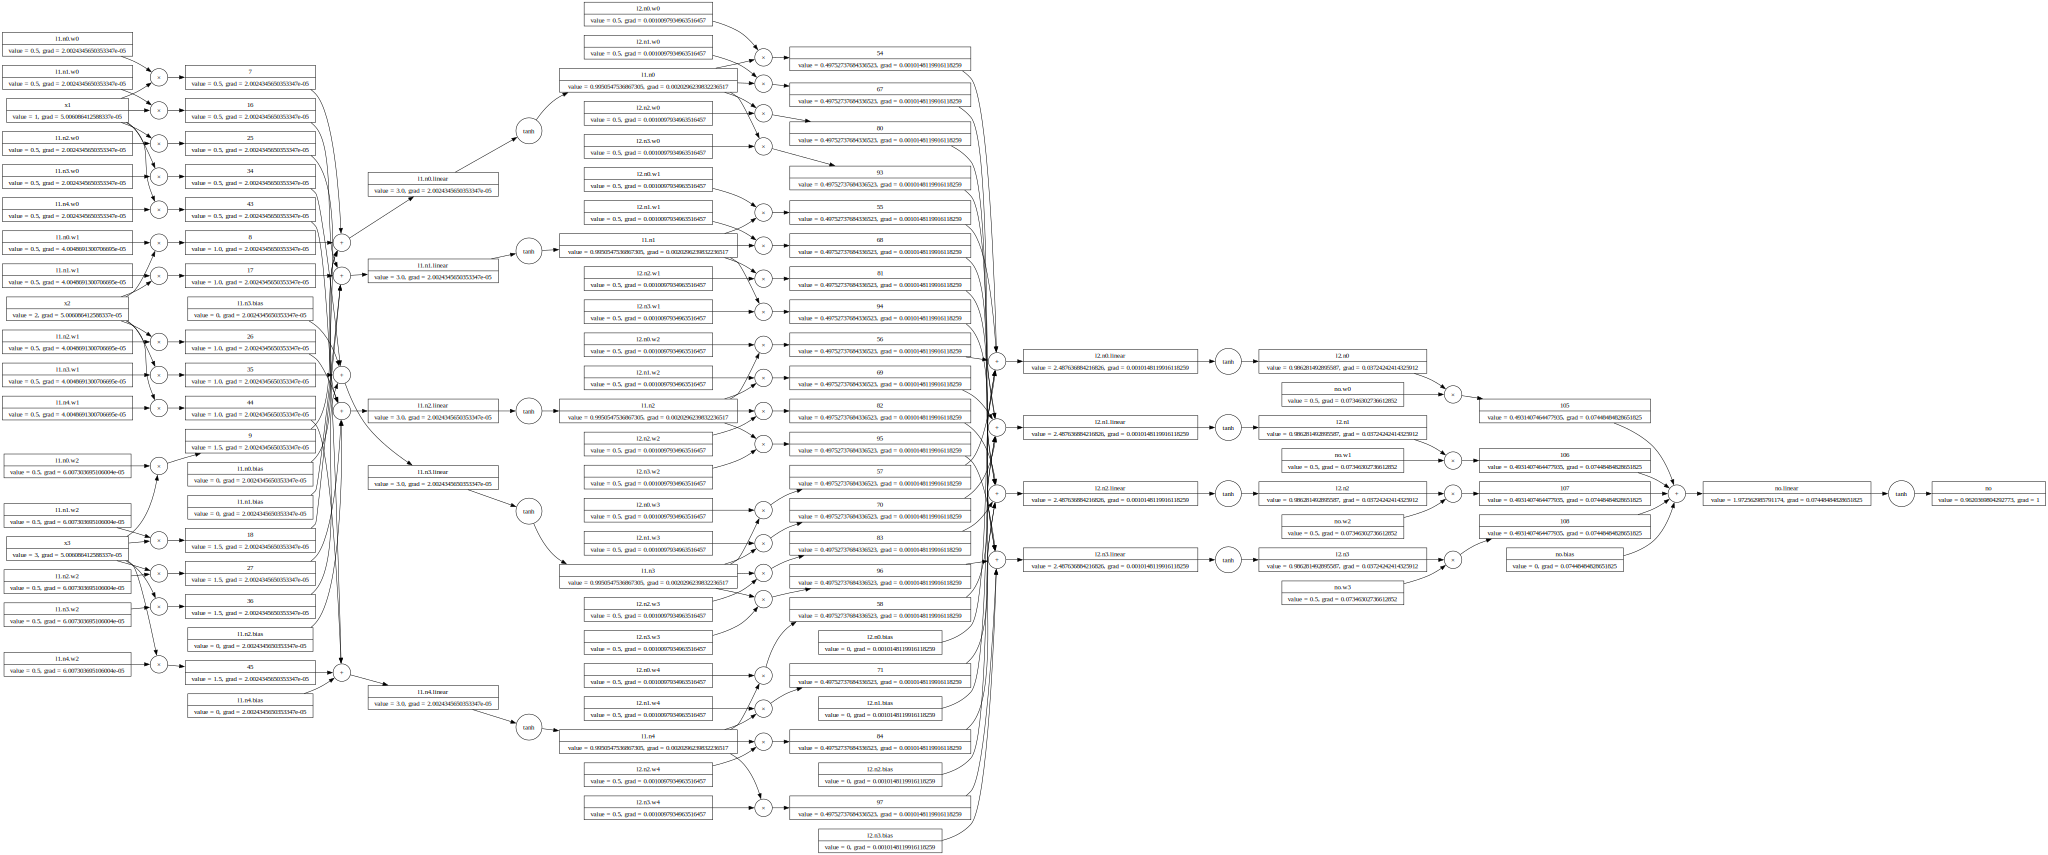

In [6]:
def network():
    G = ValueGraph()
    x = tuple(G["x1", "x2", "x3"])

    l1 = Layer("l1", G, 5, x)
    l2 = Layer("l2", G, 4, l1.outputs)
    n1 = Neuron("no", G, l2.outputs)

    a_weights = l1.assign_from(lambda: 0.5) | l2.assign_from(lambda: 0.5) | n1.assign_from(lambda: 0.5)
    return Assignment.create(G, {x[0]: 1, x[1]: 2, x[2]: 3}) | a_weights


a = network()
gv = GraphValuation.run(a)
drawing = Drawing().draw_graph_valuation(gv)
drawing

In [9]:
from torch import Tensor, tanh

def torch_version():
    x1 = Tensor([2.0]).double()
    x1.requires_grad = True
    x2 = Tensor([0.0]).double()
    x2.requires_grad = True
    w1 = Tensor([-3.0]).double()
    w1.requires_grad = True
    w2 = Tensor([1.0]).double()
    w2.requires_grad = True
    b = Tensor([6.881373587019432]).double()
    b.requires_grad = True
    n = x1 * w1 + x2 * w2 + b
    o = tanh(n)

    print(o.data.item())
    o.backward()  # type: ignore
    print("x1", x1.grad.item())  # type: ignore
    print("x2", x2.grad.item())  # type: ignore
    print("w1", w1.grad.item())  # type: ignore
    print("w2", w2.grad.item())  # type: ignore

version = torch_version()
version

0.7071066904050358
x1 -1.5000003851533106
x2 0.5000001283844369
w1 1.0000002567688737
w2 0.0
